In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bank_dataset = pd.read_csv('./exp1-new.csv')
print(bank_dataset.head())

   age        job marital    education  default  housing  loan    contact  \
0   56  housemaid       1     basic.4y        0        0     0  telephone   
1   57   services       1  high.school        0        0     0  telephone   
2   37   services       1  high.school        0        1     0  telephone   
3   40     admin.       1     basic.6y        0        0     0  telephone   
4   56   services       1  high.school        0        0     1  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  y  
0   may         mon       261         1    999         0  nonexistent  0  
1   may         mon       149         1    999         0  nonexistent  0  
2   may         mon       226         1    999         0  nonexistent  0  
3   may         mon       151         1    999         0  nonexistent  0  
4   may         mon       307         1    999         0  nonexistent  0  


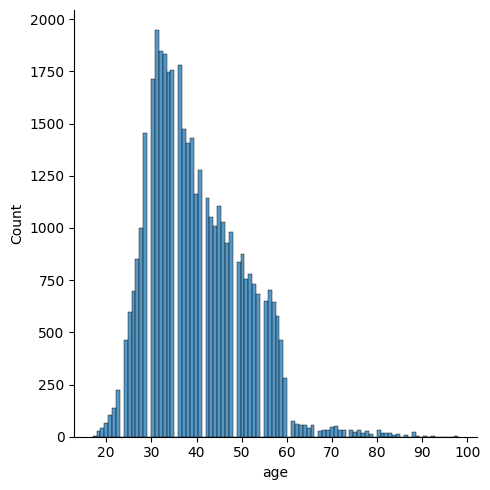

In [64]:
bank_dataset_copy = bank_dataset
sns.displot(bank_dataset_copy["age"])

In [65]:
Q1 = bank_dataset_copy['age'].quantile(0.25)
Q3 = bank_dataset_copy['age'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = bank_dataset_copy[(bank_dataset_copy['age'] < (Q1 - 1.5 * IQR)) | (bank_dataset_copy['age'] > (Q3 + 1.5 * IQR))]
print(f'Outliers Count: \n{outliers["age"].count()}/{bank_dataset["age"].count()}\n -------------------- \nOutliers First 5 data: \n {outliers.head()}\n -------------------- \nOutliers Last 5 data: \n {outliers.tail()}')

Outliers Count: 
469/41188
 -------------------- 
Outliers First 5 data: 
        age      job   marital          education  default  housing  loan  \
27713   70  retired  divorced           basic.4y        0        1     0   
27757   76  retired         1  university.degree        0        0     1   
27780   73  retired         1  university.degree        0        1     0   
27800   88  retired  divorced           basic.4y        0        1     0   
27802   88  retired  divorced           basic.4y        0        0     0   

        contact month day_of_week  duration  campaign  pdays  previous  \
27713  cellular   mar         mon       187         3    999         0   
27757  cellular   mar         thu       167         9    999         0   
27780  cellular   mar         tue       179         1    999         1   
27800  cellular   mar         wed        48         1    999         0   
27802  cellular   mar         wed       266         2    999         0   

          poutcome  y  

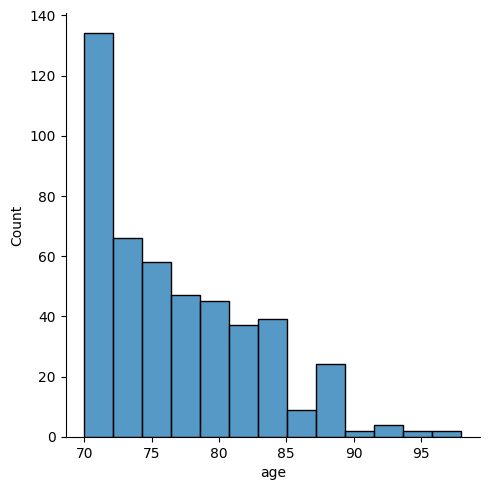

In [66]:
sns.displot(outliers["age"])

In [67]:
# Calculate quartiles and IQR
Q1 = bank_dataset_copy['age'].quantile(0.25)
Q3 = bank_dataset_copy['age'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers_low = bank_dataset_copy[bank_dataset_copy['age'] < (Q1 - 1.5 * IQR)]
outliers_high = bank_dataset_copy[bank_dataset_copy['age'] > (Q3 + 1.5 * IQR)]

# Replace outliers with the nearest non-outlier value (Q1 or Q3)
bank_dataset_copy.loc[outliers_low.index, 'age'] = Q1
bank_dataset_copy.loc[outliers_high.index, 'age'] = Q3

# Check if outliers are fixed
outliers_fixed_low = bank_dataset_copy[bank_dataset_copy['age'] < (Q1 - 1.5 * IQR)]
outliers_fixed_high = bank_dataset_copy[bank_dataset_copy['age'] > (Q3 + 1.5 * IQR)]

print(f'Outliers Count after fixing: \n{outliers_fixed_low["age"].count() + outliers_fixed_high["age"].count()}/{outliers_low["age"].count() + outliers_high["age"].count()}\n -------------------- \nOutliers First 5 data after fixing: \n {outliers_fixed_low.head()}\n -------------------- \nOutliers Last 5 data after fixing: \n {outliers_fixed_high.tail()}')


Outliers Count after fixing: 
0/469
 -------------------- 
Outliers First 5 data after fixing: 
 Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, y]
Index: []
 -------------------- 
Outliers Last 5 data after fixing: 
 Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [68]:
print(bank_dataset_copy.head())

   age        job marital    education  default  housing  loan    contact  \
0   56  housemaid       1     basic.4y        0        0     0  telephone   
1   57   services       1  high.school        0        0     0  telephone   
2   37   services       1  high.school        0        1     0  telephone   
3   40     admin.       1     basic.6y        0        0     0  telephone   
4   56   services       1  high.school        0        0     1  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  y  
0   may         mon       261         1    999         0  nonexistent  0  
1   may         mon       149         1    999         0  nonexistent  0  
2   may         mon       226         1    999         0  nonexistent  0  
3   may         mon       151         1    999         0  nonexistent  0  
4   may         mon       307         1    999         0  nonexistent  0  


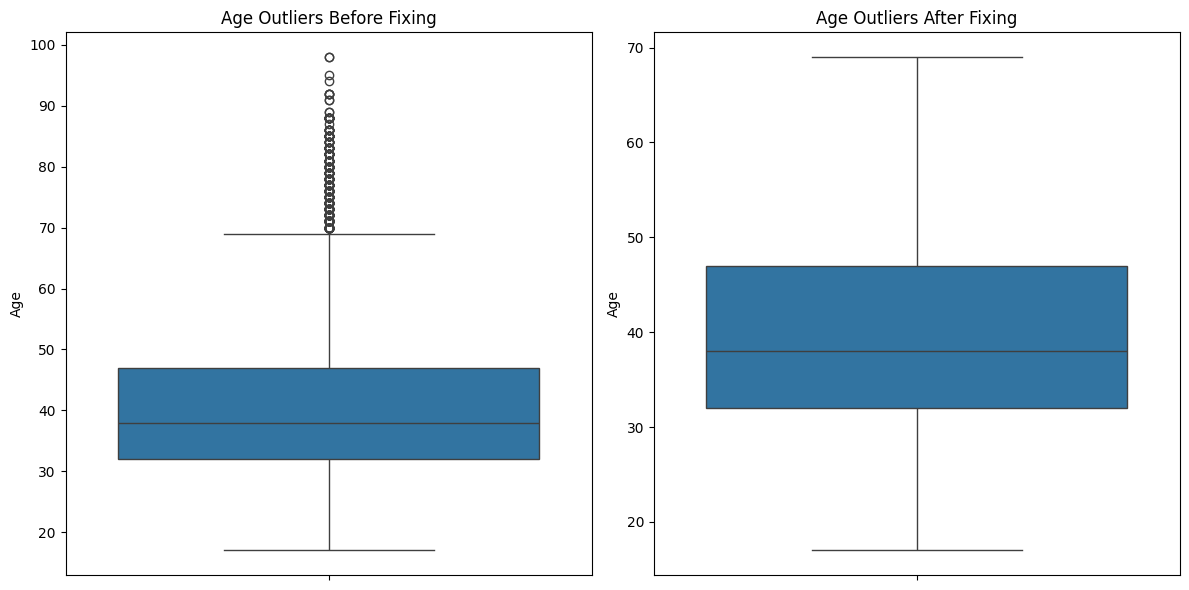

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


compare_dt = pd.read_csv('./exp1.csv')
# Plot boxplot of age before fixing outliers
sns.boxplot(data=compare_dt, y='age', ax=axes[0])
axes[0].set_title('Age Outliers Before Fixing')
axes[0].set_ylabel('Age')

# Plot boxplot of age after fixing outliers
sns.boxplot(data=bank_dataset_copy, y='age', ax=axes[1])
axes[1].set_title('Age Outliers After Fixing')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

In [70]:
# Print summary statistics of 'age' column before fixing outliers
print("Summary statistics of 'age' column before fixing outliers:")
print(compare_dt['age'].describe())

# Print summary statistics of 'age' column after fixing outliers
print("\nSummary statistics of 'age' column after fixing outliers:")
print(bank_dataset_copy['age'].describe())


Summary statistics of 'age' column before fixing outliers:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Summary statistics of 'age' column after fixing outliers:
count    41188.000000
mean        39.683282
std          9.651725
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64


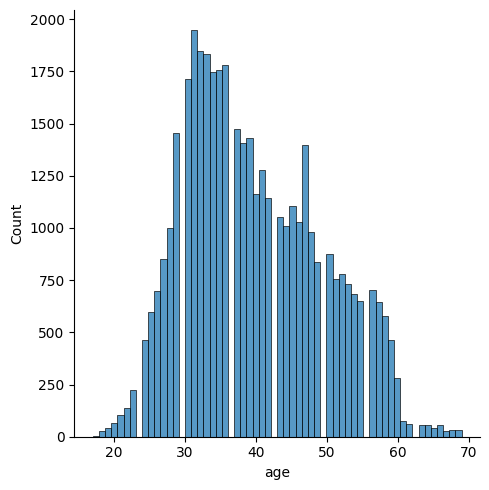

In [71]:
sns.displot(bank_dataset_copy["age"])

In [72]:
bank_dataset_copy.to_csv('exp3-new.csv', header = True, index = False)